### Basic Classification Notebook
#### The example shown here is from this youtube tutorial:
https://www.youtube.com/watch?v=tYYVSEHq-io&t=2408s

In [11]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


**Load the dataset**

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
np.unique(train_y)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

Label	Class
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

In [13]:
label_class_list = [[0, "T-shirt/top"],
 [1, "Trouser"],
 [2, "Pullover"],
 [3, "Dress"],
 [4, "Coat"],
 [5, "Sandal"],
 [6, "Shirt"],
 [7, "Sneaker"],
 [8, "Bag"],
 [9, "Ankle boot"]]
label_class_df = pd.DataFrame(label_class_list, columns = ['Label','Class'])
label_class_df

,Label,Class
0,0,T-shirt/top
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,Sneaker
8,8,Bag
9,9,Ankle boot


In [14]:
class_labels = label_class_df.Class.tolist()
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

**There are 60000 28x28 training images**

In [15]:
train_x.shape

(60000, 28, 28)

In [16]:
test_x.shape

(10000, 28, 28)

**Inspecting the training images**

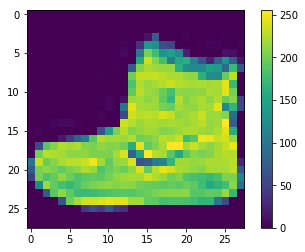

In [18]:
plt.figure()
plt.imshow(train_x[0])
plt.colorbar()
plt.grid(False)
plt.show()

The values in the images are between 0 and 255 -- we need to normalize these values to between 0 and 1 for best neural network performance

In [19]:
train_x_norm = train_x / 255
test_x_norm = test_x / 255

**Doing some plotting of these images**

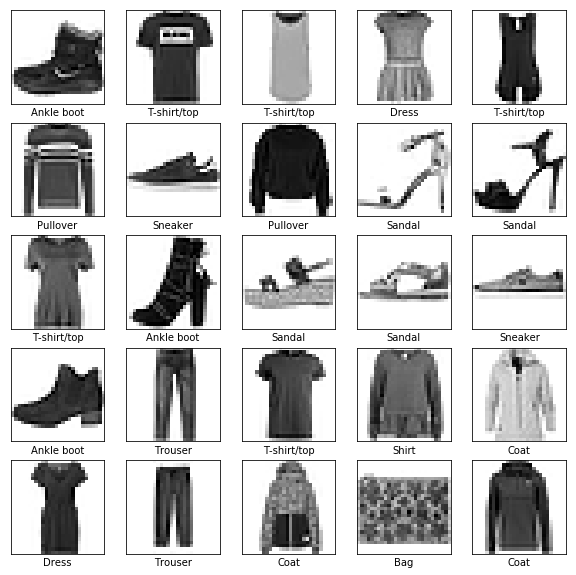

In [28]:
plt.figure(figsize=(10,10)) #set size of the full figure
for i in range(25): #only plot 25 elements
    plt.subplot(5,5,i+1) # arrange the 25 future elemnts into 5x5 matrix
    plt.xticks([]) #no xticks
    plt.yticks([]) # no yticks
    plt.grid(False) 
    plt.imshow(train_x_norm[i], cmap=plt.cm.binary) #for each training data plot the 28x28 norm'd array (img)
    plt.xlabel(class_labels[train_y[i]]) # underneath the image you just plotted, add the class label
plt.show()

### Building the model
Building the neural network requires configuring the layers of the model, then compiling the model.

#### Set up the layers
The basic building block of a neural network is the layer. **Layers extract representations from the data fed into them**. And, hopefully, these representations are more meaningful for the problem at hand.

Most of **deep learning consists of chaining together simple layers. Most layers, like tf.keras.layers.Dense, have parameters that are learned during training**

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # flattens 2-D array into a 1-D array (see #1 below)
    keras.layers.Dense(128, activation=tf.nn.relu), # inner layer with 128 neurons
    keras.layers.Dense(10, activation=tf.nn.softmax) # returns a probability of imgX being one of 10 classes
])

1. The first layer in this network, tf.keras.layers.Flatten, transforms the format of the images from a 2d-array (of 28 by 28 pixels), to a 1d-array of 28 * 28 = 784 pixels. **Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.**

2. After the pixels are flattened, the network consists of a sequence of two tf.keras.layers.Dense layers. These are **densely-connected, or fully-connected, neural layers**. The first Dense layer has 128 nodes (or neurons). The second (and last) layer is a 10-node softmax layer—this returns an array of 10 probability scores that sum to 1. Each node contains a score that indicates the probability that the current image belongs to one of the 10 classes.

#### Before training model, it must be compiled
Before the model is ready for training, it needs a few more settings. These are added during the model's compile step:



1. **Loss function**  —This measures how accurate the model is during training. We want to minimize this function to "steer" the model in the right direction.

2. **Optimizer** —This is how the model is updated based on the data it sees and its loss function

3. **Metrics** —Used to monitor the training and testing steps. The following example uses accuracy, the fraction of the images that are correctly classified

In [32]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#### Training the model
Training the neural network model requires the following steps:

1. Feed the training data to the model—in this example, the train_x_norm and train_y arrays.

2. The model learns to associate images and labels.

3. We ask the model to make predictions about a test set—in this example, the test_images array. We verify that the predictions match the labels from the test_labels array.

In [33]:
model.fit(train_x_norm, train_y, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 3s 49us/step - loss: 0.4979 - acc: 0.8257
Epoch 2/5
60000/60000 [==============================] - 3s 43us/step - loss: 0.3767 - acc: 0.8642
Epoch 3/5
60000/60000 [==============================] - 3s 48us/step - loss: 0.3357 - acc: 0.8780
Epoch 4/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.3131 - acc: 0.8844
Epoch 5/5
60000/60000 [==============================] - 3s 44us/step - loss: 0.2968 - acc: 0.8907


#### Evaluate accuracy on the test set

In [35]:
test_loss, test_acc = model.evaluate(test_x_norm, test_y)
print('\n')
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 20us/step


Test accuracy: 0.8632


#### Making predictions

In [37]:
predictions = model.predict(test_x_norm)
predictions[0]

array([4.5772581e-06, 3.8776097e-08, 2.1003423e-07, 2.9607300e-08,
       3.8170944e-07, 1.1077007e-01, 9.3110939e-05, 1.1696089e-01,
       2.8525235e-05, 7.7214217e-01], dtype=float32)

In [42]:
print("MODEL PREDICTION FOR FIRST TEST IMAGE: ", np.argmax(predictions[0]))

MODEL PREDICTION FOR FIRST TEST IMAGE:  9


In [40]:
print("ACTUAL LABEL FOR FIRST TEST IMAGE: ", test_y[0])

ACTUAL LABEL FOR FIRST TEST IMAGE:  9


In [47]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_labels[predicted_label],
                                100*np.max(predictions_array),
                                class_labels[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

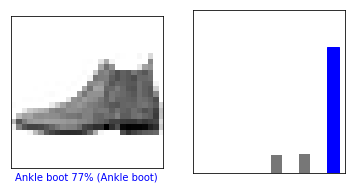

In [48]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_y, test_x_norm)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_y)

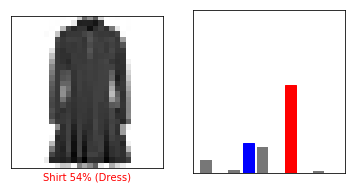

In [49]:
i = 29
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_y, test_x_norm)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_y)

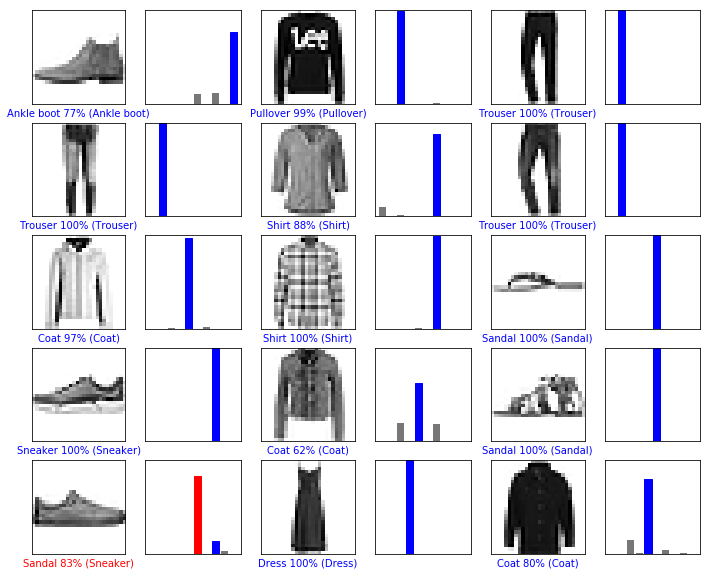

In [50]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_y, test_x_norm)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_y)